# Anomaly Detection using Multiple Autoencoders for Tennessee Eastman

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Flatten
from keras import regularizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from tensorflow.random import set_seed
from keras.regularizers import l1,l2,l1_l2

# Read data

In [139]:
# Train data without faults
train_free = pd.read_csv('../data/processed/TEP_train_free.csv')

In [140]:
vars_reactor = [ 'xmeas_4',  'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_21', 'xmv_9', 'xmv_4']
vars_separator = ['xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_22', 'xmeas_10','xmv_6', 'xmv_7', 'xmv_11']
vars_stripper = ['xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmv_8']
vars_streams = ['xmeas_1', 'xmeas_2', 'xmeas_3','xmeas_5', 'xmeas_6', 'xmv_5', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_10']

In [141]:
# Dividir o treino em 4 grupos
train1 = train_free[vars_reactor]
train2 = train_free[vars_separator]
train3 = train_free[vars_stripper]
train4 = train_free[vars_streams]

In [142]:
# Test data with faults
test_faulty = pd.read_csv('../data/processed/TEP_test_faulty.csv') # Only 480000 rows are read to have the same length as test_free

In [143]:
test_faulty.shape

(20160, 54)

In [144]:
test_free.shape

(960, 53)

In [145]:
# Test data without faults
test_free   = pd.read_csv('../data/processed/TEP_test_free.csv')

In [146]:
test_faulty1 = test_faulty[vars_reactor]
test_faulty2 = test_faulty[vars_separator]
test_faulty3 = test_faulty[vars_stripper]
test_faulty4 = test_faulty[vars_streams]

In [147]:
test_free1 = test_free[vars_reactor]
test_free2 = test_free[vars_separator]
test_free3 = test_free[vars_stripper]
test_free4 = test_free[vars_streams]


# Preprocessing

In [148]:
#Scale each train partition
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
scaler4 = StandardScaler()

X_train1 = scaler1.fit_transform(train1)
X_train2 = scaler2.fit_transform(train2)
X_train3 = scaler3.fit_transform(train3)
X_train4 = scaler4.fit_transform(train4)

In [149]:
# Scale each test partition
X_test1 = scaler1.transform(test_faulty1)
X_test2 = scaler2.transform(test_faulty2)
X_test3 = scaler3.transform(test_faulty3)
X_test4 = scaler4.transform(test_faulty4)

In [150]:
# Scale each test free partition
X_test_free1 = scaler1.transform(test_free1)
X_test_free2 = scaler2.transform(test_free2)
X_test_free3 = scaler3.transform(test_free3)
X_test_free4 = scaler4.transform(test_free4)

# Define Autoencoders

## Autoencoder 1 - Reactor variables

In [151]:

input_size = X_train1.shape[1]
code_size = 3
np.random.seed(8)
set_seed(8)
x = Input(shape=(input_size,))
h = Dense(code_size, activation='tanh',bias_regularizer=l2(1))(x)
r = Dense(input_size, activation='sigmoid')(h)

autoencoder1 = Model(inputs=x, outputs=r)
encoder1 = Model(x, h)
autoencoder1.compile(optimizer='adam', loss='mse')

## Autoencoder 2 - Separator variables

In [152]:

input_size = X_train2.shape[1]
code_size = 4
np.random.seed(8)
set_seed(8)
x = Input(shape=(input_size,))
h = Dense(code_size, activation='tanh',bias_regularizer=l2(1))(x)
r = Dense(input_size, activation='sigmoid')(h)

autoencoder2 = Model(inputs=x, outputs=r)
encoder2 = Model(x, h)
autoencoder2.compile(optimizer='adam', loss='mse')

## Autoencoder 3 - Stripper Variables

In [153]:
input_size = X_train3.shape[1]
code_size = 3
np.random.seed(8)
set_seed(8)
x = Input(shape=(input_size,))
h = Dense(code_size, activation='tanh',bias_regularizer=l2(1))(x)
r = Dense(input_size, activation='sigmoid')(h)

autoencoder3 = Model(inputs=x, outputs=r)
encoder3 = Model(x, h)
autoencoder3.compile(optimizer='adam', loss='mse')

## Autoencoder 4 - Streams

In [154]:
input_size = X_train4.shape[1]
code_size = 5
np.random.seed(8)
set_seed(8)
x = Input(shape=(input_size,))
h = Dense(code_size, activation='tanh',bias_regularizer=l2(1))(x)
r = Dense(input_size, activation='sigmoid')(h)

autoencoder4 = Model(inputs=x, outputs=r)
encoder4 = Model(x, h)
autoencoder4.compile(optimizer='adam', loss='mse')

In [155]:
autoencoder4.summary()

Model: "functional_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                60        
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


# Train autoencoders

## Autoencoder 1

In [156]:
%%time
np.random.seed(8)
set_seed(8)
epochs = 60
batch_size = 500
np.random.seed(10)
history1 = autoencoder1.fit(X_train1, X_train1, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_free1, X_test_free1))

Epoch 1/60
1/1 [==============================] - 0s 146ms/step - loss: 1.2173 - val_loss: 1.4289
Epoch 2/60
1/1 [==============================] - 0s 22ms/step - loss: 1.2164 - val_loss: 1.4279
Epoch 3/60
1/1 [==============================] - 0s 20ms/step - loss: 1.2155 - val_loss: 1.4270
Epoch 4/60
1/1 [==============================] - 0s 18ms/step - loss: 1.2146 - val_loss: 1.4260
Epoch 5/60
1/1 [==============================] - 0s 17ms/step - loss: 1.2137 - val_loss: 1.4250
Epoch 6/60
1/1 [==============================] - 0s 24ms/step - loss: 1.2128 - val_loss: 1.4240
Epoch 7/60
1/1 [==============================] - 0s 21ms/step - loss: 1.2119 - val_loss: 1.4231
Epoch 8/60
1/1 [==============================] - 0s 21ms/step - loss: 1.2110 - val_loss: 1.4221
Epoch 9/60
1/1 [==============================] - 0s 18ms/step - loss: 1.2101 - val_loss: 1.4212
Epoch 10/60
1/1 [==============================] - 0s 25ms/step - loss: 1.2093 - val_loss: 1.4202
Epoch 11/60
1/1 [===========

## Autoencoder 2

In [157]:
%%time
np.random.seed(8)
set_seed(8)
epochs = 60
batch_size = 500
np.random.seed(10)
history2 = autoencoder2.fit(X_train2, X_train2, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test_free2, X_test_free2))

Epoch 1/60
1/1 - 0s - loss: 1.1987 - val_loss: 1.3547
Epoch 2/60
1/1 - 0s - loss: 1.1975 - val_loss: 1.3534
Epoch 3/60
1/1 - 0s - loss: 1.1963 - val_loss: 1.3522
Epoch 4/60
1/1 - 0s - loss: 1.1952 - val_loss: 1.3509
Epoch 5/60
1/1 - 0s - loss: 1.1940 - val_loss: 1.3497
Epoch 6/60
1/1 - 0s - loss: 1.1929 - val_loss: 1.3485
Epoch 7/60
1/1 - 0s - loss: 1.1918 - val_loss: 1.3472
Epoch 8/60
1/1 - 0s - loss: 1.1906 - val_loss: 1.3460
Epoch 9/60
1/1 - 0s - loss: 1.1895 - val_loss: 1.3448
Epoch 10/60
1/1 - 0s - loss: 1.1884 - val_loss: 1.3436
Epoch 11/60
1/1 - 0s - loss: 1.1873 - val_loss: 1.3424
Epoch 12/60
1/1 - 0s - loss: 1.1862 - val_loss: 1.3412
Epoch 13/60
1/1 - 0s - loss: 1.1851 - val_loss: 1.3401
Epoch 14/60
1/1 - 0s - loss: 1.1840 - val_loss: 1.3389
Epoch 15/60
1/1 - 0s - loss: 1.1829 - val_loss: 1.3377
Epoch 16/60
1/1 - 0s - loss: 1.1819 - val_loss: 1.3366
Epoch 17/60
1/1 - 0s - loss: 1.1808 - val_loss: 1.3354
Epoch 18/60
1/1 - 0s - loss: 1.1797 - val_loss: 1.3343
Epoch 19/60
1/1 - 0

## Autoencoder 3

In [158]:
%%time
np.random.seed(8)
set_seed(8)
epochs = 60
batch_size = 500
np.random.seed(10)
history3 = autoencoder3.fit(X_train3, X_train3, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test_free3, X_test_free3))

Epoch 1/60
1/1 - 0s - loss: 1.1948 - val_loss: 1.5367
Epoch 2/60
1/1 - 0s - loss: 1.1939 - val_loss: 1.5358
Epoch 3/60
1/1 - 0s - loss: 1.1930 - val_loss: 1.5349
Epoch 4/60
1/1 - 0s - loss: 1.1921 - val_loss: 1.5340
Epoch 5/60
1/1 - 0s - loss: 1.1911 - val_loss: 1.5331
Epoch 6/60
1/1 - 0s - loss: 1.1902 - val_loss: 1.5321
Epoch 7/60
1/1 - 0s - loss: 1.1893 - val_loss: 1.5312
Epoch 8/60
1/1 - 0s - loss: 1.1884 - val_loss: 1.5303
Epoch 9/60
1/1 - 0s - loss: 1.1875 - val_loss: 1.5294
Epoch 10/60
1/1 - 0s - loss: 1.1866 - val_loss: 1.5285
Epoch 11/60
1/1 - 0s - loss: 1.1857 - val_loss: 1.5276
Epoch 12/60
1/1 - 0s - loss: 1.1848 - val_loss: 1.5267
Epoch 13/60
1/1 - 0s - loss: 1.1839 - val_loss: 1.5258
Epoch 14/60
1/1 - 0s - loss: 1.1831 - val_loss: 1.5249
Epoch 15/60
1/1 - 0s - loss: 1.1822 - val_loss: 1.5240
Epoch 16/60
1/1 - 0s - loss: 1.1813 - val_loss: 1.5231
Epoch 17/60
1/1 - 0s - loss: 1.1804 - val_loss: 1.5222
Epoch 18/60
1/1 - 0s - loss: 1.1795 - val_loss: 1.5213
Epoch 19/60
1/1 - 0

## Autoencoder 4

In [159]:
%%time
np.random.seed(8)
set_seed(8)
epochs = 60
batch_size = 500
np.random.seed(10)
history4 = autoencoder4.fit(X_train4, X_train4, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test_free4, X_test_free4))

Epoch 1/60
1/1 - 0s - loss: 1.2744 - val_loss: 1.4923
Epoch 2/60
1/1 - 0s - loss: 1.2732 - val_loss: 1.4909
Epoch 3/60
1/1 - 0s - loss: 1.2719 - val_loss: 1.4895
Epoch 4/60
1/1 - 0s - loss: 1.2707 - val_loss: 1.4881
Epoch 5/60
1/1 - 0s - loss: 1.2695 - val_loss: 1.4868
Epoch 6/60
1/1 - 0s - loss: 1.2683 - val_loss: 1.4854
Epoch 7/60
1/1 - 0s - loss: 1.2671 - val_loss: 1.4841
Epoch 8/60
1/1 - 0s - loss: 1.2659 - val_loss: 1.4828
Epoch 9/60
1/1 - 0s - loss: 1.2648 - val_loss: 1.4814
Epoch 10/60
1/1 - 0s - loss: 1.2636 - val_loss: 1.4801
Epoch 11/60
1/1 - 0s - loss: 1.2624 - val_loss: 1.4788
Epoch 12/60
1/1 - 0s - loss: 1.2613 - val_loss: 1.4775
Epoch 13/60
1/1 - 0s - loss: 1.2601 - val_loss: 1.4762
Epoch 14/60
1/1 - 0s - loss: 1.2589 - val_loss: 1.4749
Epoch 15/60
1/1 - 0s - loss: 1.2578 - val_loss: 1.4735
Epoch 16/60
1/1 - 0s - loss: 1.2566 - val_loss: 1.4722
Epoch 17/60
1/1 - 0s - loss: 1.2555 - val_loss: 1.4709
Epoch 18/60
1/1 - 0s - loss: 1.2543 - val_loss: 1.4696
Epoch 19/60
1/1 - 0

# Select threshold

In [160]:
def pred_and_mae(autoencoder,x):
    """
    Get predictions from autoencoder using x as input and calculate MAE for each prediction
    Input:
        autoencoder: obj Keras model for autoencoder
        x: input data for autoencoder
    Output:
        x_pred: numpy array  predicted values for x
        mae: numpy array mean absolute error for each prediction
    """
    x_pred = autoencoder.predict(x)
    mae = np.mean(np.abs(x_pred - x), axis=1)
    return x_pred, mae

In [161]:
# Lists of autoencoders, train and test sets
autoencoders = [autoencoder1,autoencoder2,autoencoder3,autoencoder4]
train = [X_train1,X_train2,X_train3,X_train4]
tests_free = [X_test_free1,X_test_free2,X_test_free3,X_test_free4]
tests = [X_test1,X_test2,X_test3,X_test4]


In [162]:
# Make predictions and calculate mae for the train, test and test free sets
x_train_pred = {}
x_test_pred ={}
x_test_free_pred = {}
train_mae = {}
test_mae = {}
test_free_mae = {}
for i in range(4):
    x_train_pred[i+1], train_mae[i+1] =pred_and_mae(autoencoders[i],train[i])
    x_test_pred[i+1], test_mae[i+1] = pred_and_mae(autoencoders[i],tests[i])
    x_test_free_pred[i+1], test_free_mae[i+1] = pred_and_mae(autoencoders[i],tests_free[i])


## Save MAE

In [163]:
train_mae_df = pd.DataFrame(train_mae)
#train_mae_df.to_csv('train_mae.csv')

In [164]:
test_mae_df = pd.DataFrame(test_mae)
#test_mae_df.to_csv('test_mae.csv')

In [165]:
test_free_mae_df = pd.DataFrame(test_free_mae)
#test_free_mae_df.to_csv("test_free_mae.csv")

# Apply threshold

Use 99% MAE as threshold for each autoencoder

In [166]:
test_mae[1].shape

(20160,)

In [167]:
index = np.arange(len(test_mae[1]))
normal = index[(index%960)<160]
mask_normal = np.zeros(len(test_mae[1]), dtype=bool)
mask_normal[normal] = 1

In [168]:
thresholds = [np.quantile(train_mae[i],.99) for i in range(1,5) ]

In [169]:
anom_test_99 = np.zeros_like(test_mae[1],dtype=np.bool)
anom_test_free_99 = np.zeros_like(test_free_mae[1],dtype=np.bool)
for i in range(1,5):
    anom_test_99 = anom_test_99 | (test_mae[i] > thresholds[i-1])
    anom_test_free_99 = anom_test_free_99 | (test_free_mae[i]>thresholds[i-1])


In [170]:
TPR_99 = (anom_test_99 & ~mask_normal).sum()/(~mask_normal).sum()

In [171]:
FPR_99 = (anom_test_free_99.sum() + (anom_test_99 & mask_normal).sum() )/(len(anom_test_free_99) + mask_normal.sum())


In [174]:
#True positive rate when threshold = 99%
print(f'TPR:{TPR_99*100:.2f}%') #%

TPR:69.04%


In [173]:
print(f'FPR:{round(FPR_99*100,2)}%')

FPR:8.96%


# Visualizations

In [175]:
test_faulty

,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,fault_number
0,0,0.25025,3657.2,4520.1,9.3965,26.715,42.191,2704.5,74.593,120.42,...,24.670,61.839,22.101,40.078,33.041,48.969,47.459,41.841,18.049,1
1,1,0.25135,3662.1,4532.3,9.4020,26.644,42.812,2704.9,75.044,120.39,...,24.562,61.348,22.264,40.050,39.154,49.870,47.403,41.188,18.008,1
2,2,0.25045,3681.9,4493.6,9.2395,26.971,42.282,2705.0,75.405,120.42,...,24.659,61.826,22.312,40.147,39.294,44.511,47.265,41.290,18.009,1
3,3,0.25056,3667.9,4466.0,9.3602,26.937,42.194,2705.9,75.397,120.41,...,24.648,63.168,22.288,39.845,36.334,46.168,47.410,40.997,17.771,1
4,4,0.28659,3693.0,4502.5,9.5652,26.999,42.540,2704.3,74.749,120.39,...,28.430,57.566,22.142,40.806,34.882,45.576,47.424,41.290,19.371,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,955,0.27523,3671.0,4466.0,9.3419,27.046,42.081,2667.9,70.154,120.40,...,27.136,61.302,21.065,42.453,36.285,45.960,31.423,41.172,16.318,21
20156,956,0.20483,3647.4,4490.1,9.3633,27.066,42.666,2668.4,69.698,120.41,...,20.300,61.302,21.192,39.202,40.665,45.334,31.037,41.481,17.050,21
20157,957,0.20527,3625.7,4474.0,9.3742,27.040,41.639,2668.5,69.244,120.39,...,20.256,61.302,21.249,39.339,39.426,51.300,30.616,40.997,14.843,21
20158,958,0.23677,3664.5,4526.8,9.3336,26.738,42.058,2669.7,69.251,120.41,...,23.585,61.302,21.206,39.534,40.727,46.580,30.466,41.234,18.443,21


In [178]:
anom_test_99.shape

(20160,)

In [177]:
test_faulty.shape

(20160, 54)

In [179]:
percentage_right_per_fault1 = test_faulty[['fault_number','sample']][(anom_test_99[:960*21]==1) & (test_faulty['sample']>160) ].groupby('fault_number').count()*100/800

In [180]:
round(percentage_right_per_fault1,2)

,sample
fault_number,
1,99.62
2,98.38
3,17.38
4,64.12
5,37.62
6,99.88
7,99.88
8,98.38
9,17.38


<AxesSubplot:xlabel='fault_number'>

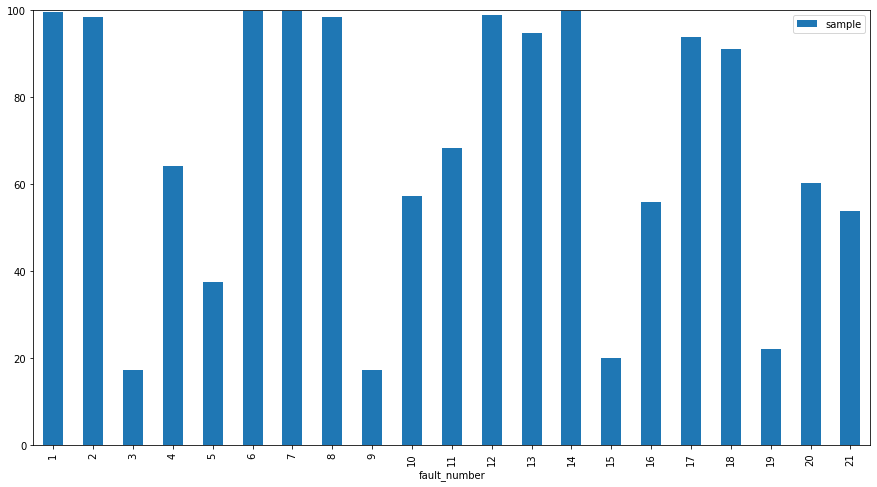

In [181]:
percentage_right_per_fault1.plot(kind='bar',figsize=(15,8),ylim=(0,100))

In [183]:
test_mae_mask = {}
for i in range(1,5):
    test_mae_mask[i] =  np.ma.array(test_mae[i],mask=~anom_test_99)

In [184]:
test_free_mae_mask = {}
for i in range(1,5):
    test_free_mae_mask[i] =  np.ma.array(test_free_mae[i],mask=~anom_test_free_99)

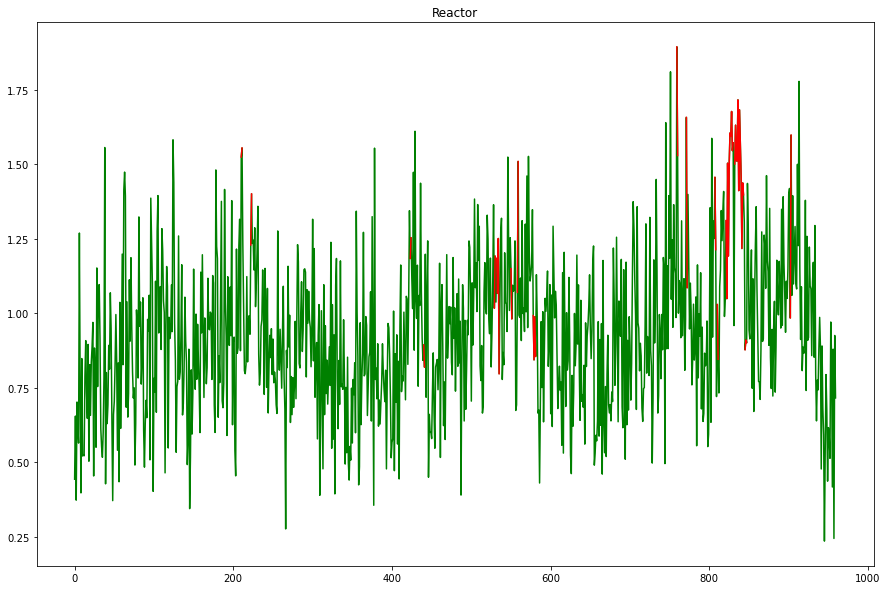

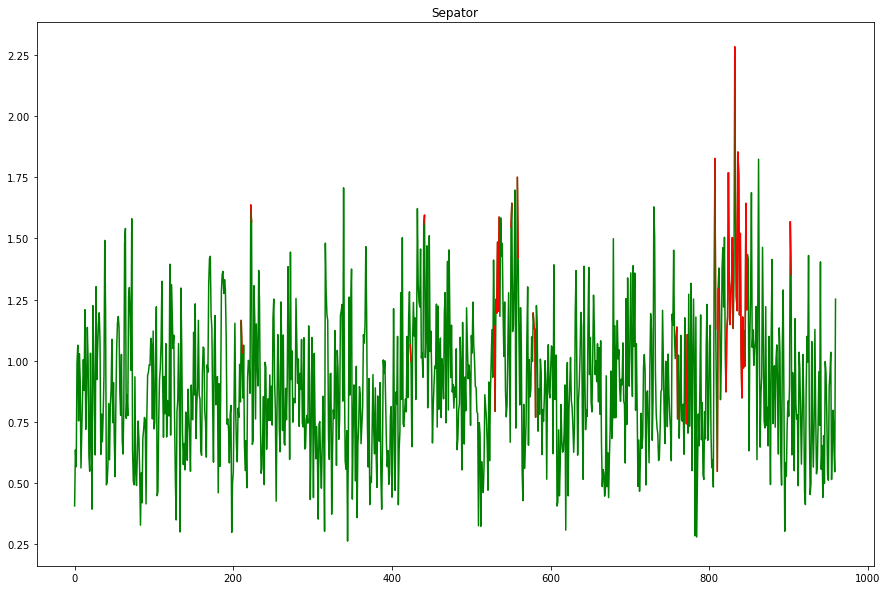

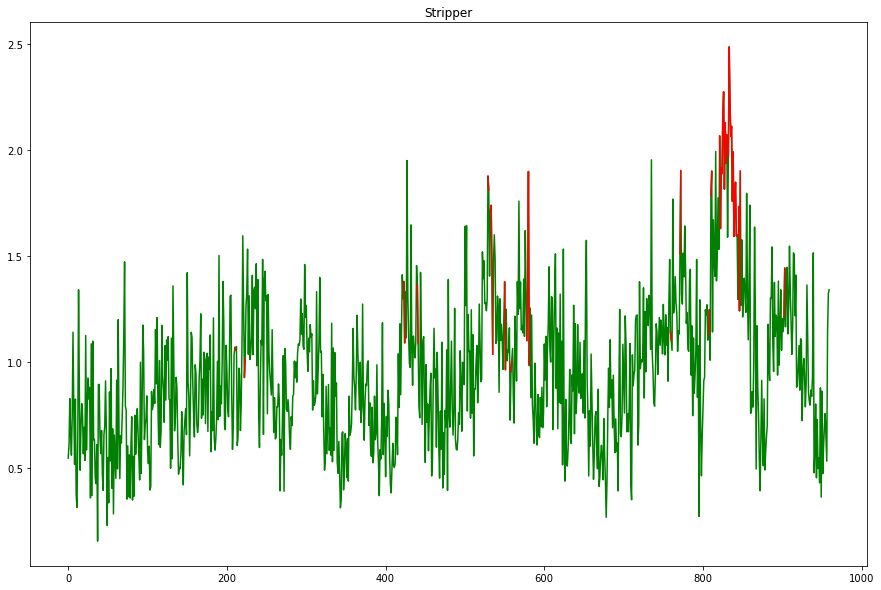

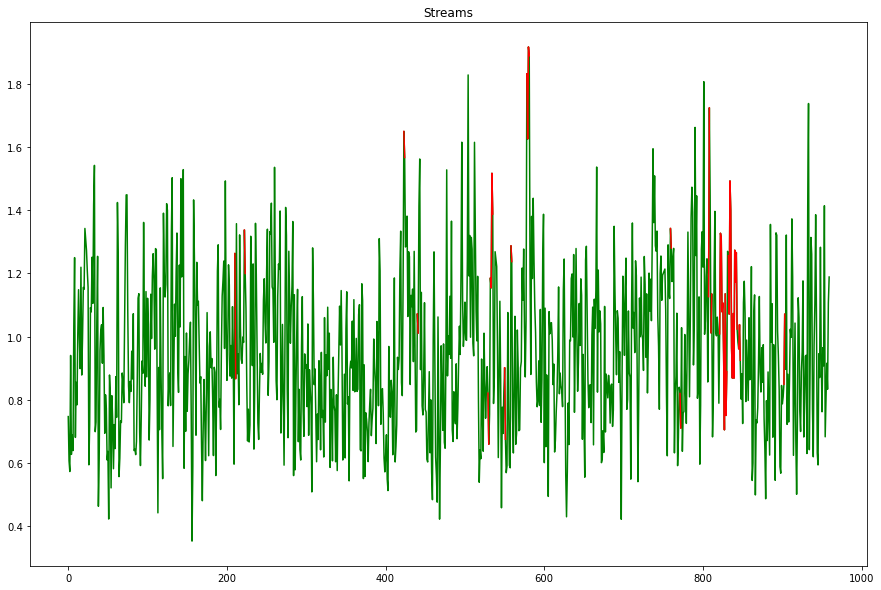

In [189]:
titles = ['Reactor','Sepator','Stripper','Streams']
for i in range(1,5):
    plt.figure(figsize=(15,10))
    plt.plot(test_free_mae[i][:960*21],'g')
    plt.plot(test_free_mae_mask[i][:960*21],'r')
    plt.title(titles[i-1])
    #for j in range(1,21):
     #   plt.axvline(960*j,color='k')
      #  plt.text(x=960*j-480,y=18,s=j)
    plt.show()

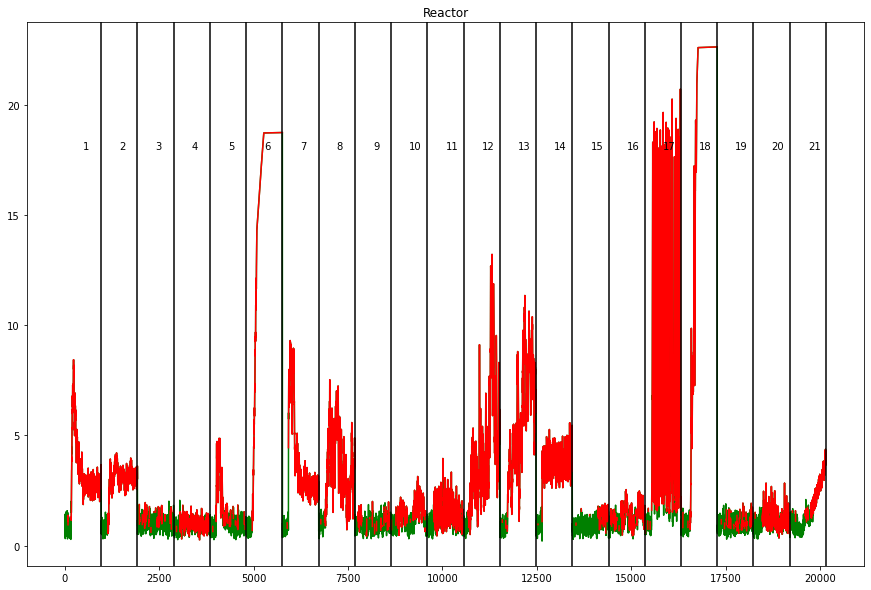

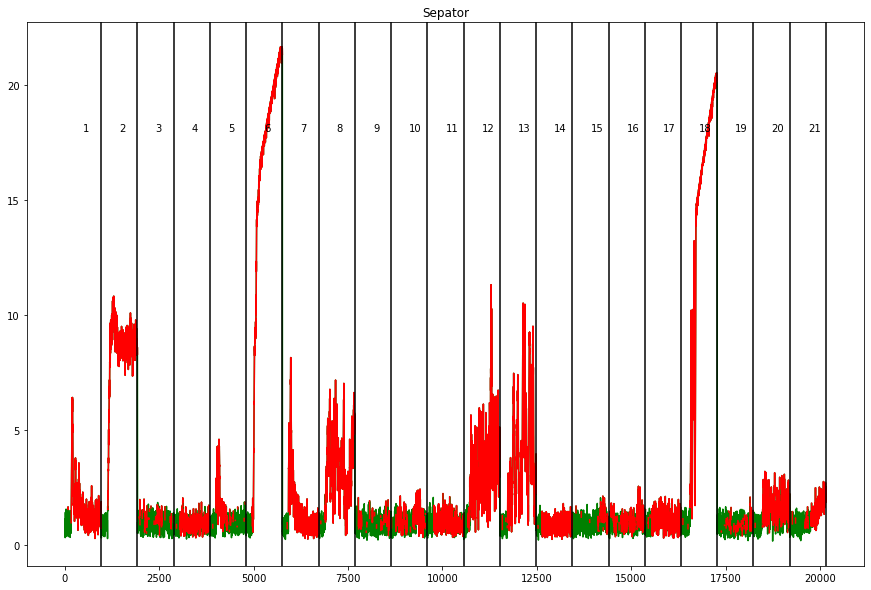

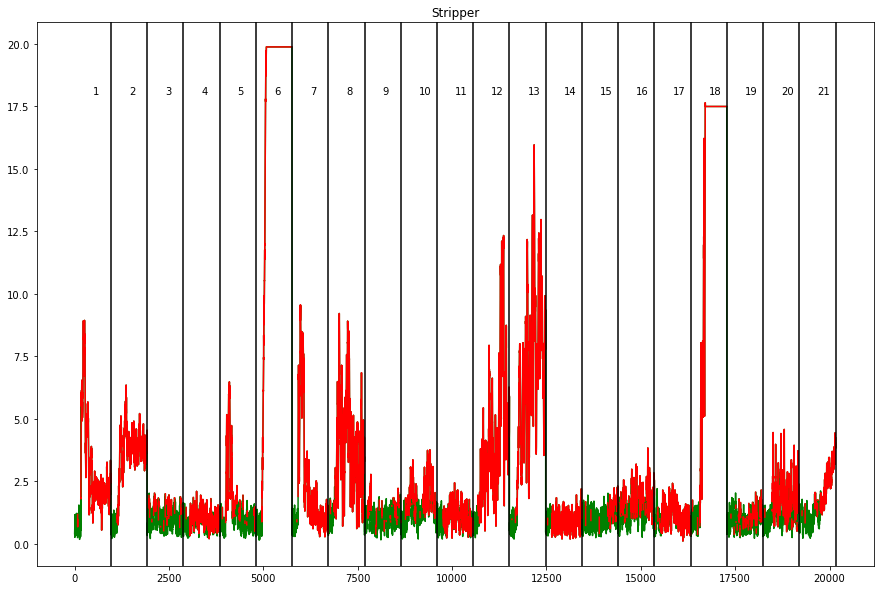

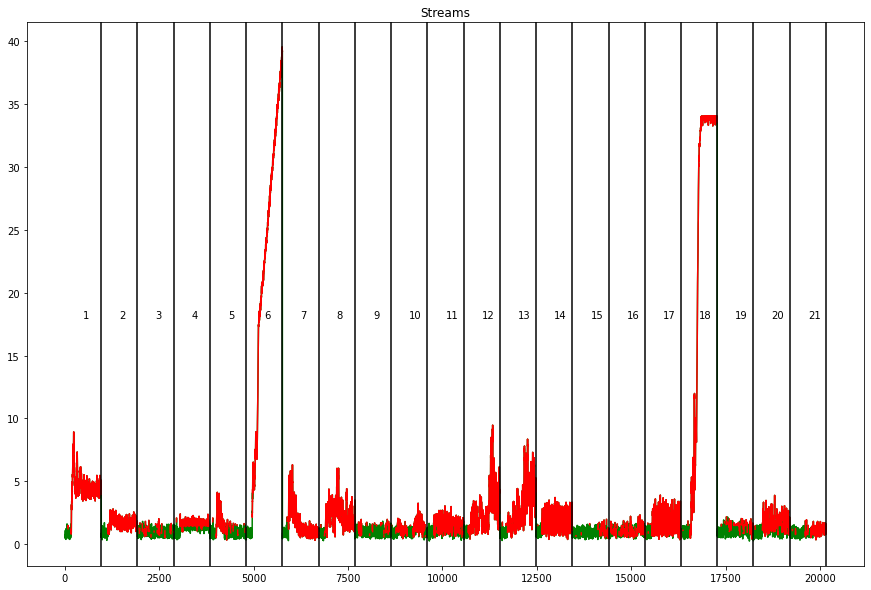

In [195]:
titles = ['Reactor','Sepator','Stripper','Streams']
for i in range(1,5):
    plt.figure(figsize=(15,10))
    plt.plot(test_mae[i][:960*21],'g')
    plt.plot(test_mae_mask[i][:960*21],'r')
    plt.title(titles[i-1])
    for j in range(1,22):
        plt.axvline(960*j,color='k')
        plt.text(x=960*j-480,y=18,s=j)
    plt.show()

# ROI Curves

In [232]:
def ROI_curve2(train_mae,test_mae,test_free_mae,plot=True):
    
    # Create mask for normal points in the test faulty set
    index = np.arange(len(test_mae[1]))
    normal = index[(index%960)<160]
    mask_normal = np.zeros(len(test_mae[1]), dtype=bool)
    mask_normal[normal] = 1
    # Select quantiles for the creation of thresholds
    quantiles = np.concatenate((np.arange(0,0.1,0.001),np.arange(0.1,0.9,0.01),np.arange(0.9,1.001,0.001)))
    #thresholds = np.quantile(train_mae_loss,quantiles)
    
    # Create thresholds for each autoencoder
    thresholds = np.array([np.quantile(train_mae[i],quantiles) for i in range(1,5) ])
    
    #Create arrays for TPR and FPR
    true_positive_rate  = np.empty_like(thresholds[0])
    false_positive_rate = np.empty_like(thresholds[0])
    # Calculate totals
    total_positive = test_mae[1].shape[0]  - mask_normal.sum() # do not count normal points 
    total_negative = test_free_mae[1].shape[0] + mask_normal.shape[0] # add normal points in test faulty
    # Initialize anomaly arrays
    anom_test = []
    anom_test_free = []
    # Calculate anomalies

    for k in range(thresholds.shape[1]):
        anom_test.append(np.zeros_like(test_mae[1],dtype=np.bool))
        anom_test_free.append(np.zeros_like(test_free_mae[1],dtype=np.bool))
        for i in range(4):
            anom_test[k] = anom_test[k] | (test_mae[i+1] > thresholds[i,k])
            anom_test_free[k] = anom_test_free[k] | (test_free_mae[i+1]>thresholds[i,k])
        true_positive_count = (anom_test[k]*~mask_normal ).sum()
        false_positive_count = anom_test_free[k].sum() + (anom_test[k]*mask_normal).sum()
        true_positive_rate[k] = true_positive_count/total_positive
        false_positive_rate[k] = false_positive_count/total_negative
    false_positive_rate= np.insert(false_positive_rate,0,1)
    true_positive_rate = np.insert(true_positive_rate,0,1)
    if plot:
        plt.figure()
        plt.title("ROC Curve")
        plt.plot(false_positive_rate, true_positive_rate,'-')
        plt.plot([0,1],[0,1],'-')
        plt.ylabel("TPR")
        plt.xlabel("FPR")
        plt.xlim((0,1.01))
        plt.ylim((0,1.01))
        plt.show()
    return((false_positive_rate,true_positive_rate))

In [209]:
test_mae_f = {}
for k in range(1,22):
    test_mae_f[k] = {}
    for i in range(1,5):
        test_mae_f[k][i] = test_mae[i][(0+960*(k-1)):(960*k)]

In [198]:
#n_falhaspreditas/n_falhas_totais

In [199]:
#n_falso_positivo/n_sem_falhas

In [200]:
#test_sem_falhas+160

In [201]:
from sklearn.metrics import auc

In [210]:
FPRs = {}
TPRs = {}
AUCs = {}
for k in range(1,22):
    FPRs[k],TPRs[k] = ROI_curve2(train_mae,test_mae_f[k],test_free_mae,plot=False)
    FPRs[k] = np.append(np.insert(FPRs[k],0,1),0)
    TPRs[k] = np.append(np.insert(TPRs[k],0,1),0)
    AUCs[k] = auc(FPRs[k],TPRs[k])

In [211]:
s = np.stack((FPRs[1], TPRs[1]),axis=1)

In [212]:
for i in range(1,21):
    _df = pd.DataFrame({'FPR':FPRs[i],'TPR':TPRs[i]})
    _df.to_csv(f"Autoencoder_ROC_Tns_F{i}.csv",index=False)

In [213]:
np.savetxt('ROC_curve_F1.csv',s,delimiter=',',header='FPR,TPR')

In [231]:
for failure in range(1,22):
    print(f"AUC for failure {failure} is: {AUCs[failure]:.04f}")

AUC for failure 1 is: 0.9928
AUC for failure 2 is: 0.9881
AUC for failure 3 is: 0.7603
AUC for failure 4 is: 0.9273
AUC for failure 5 is: 0.8082
AUC for failure 6 is: 0.9935
AUC for failure 7 is: 0.9930
AUC for failure 8 is: 0.9908
AUC for failure 9 is: 0.7407
AUC for failure 10 is: 0.8817
AUC for failure 11 is: 0.9156
AUC for failure 12 is: 0.9905
AUC for failure 13 is: 0.9820
AUC for failure 14 is: 0.9932
AUC for failure 15 is: 0.7559
AUC for failure 16 is: 0.8745
AUC for failure 17 is: 0.9771
AUC for failure 18 is: 0.9672
AUC for failure 19 is: 0.7919
AUC for failure 20 is: 0.8944
AUC for failure 21 is: 0.8561


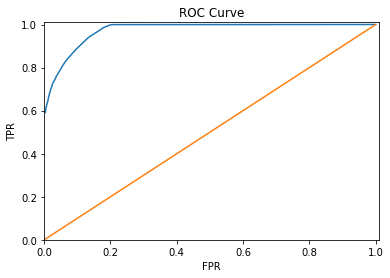

In [233]:
fpr,tpr = ROI_curve2(train_mae,test_mae,test_free_mae)

In [234]:
# Add point 1,1 to the ROI Curve
fpr_auc= np.insert(fpr,0,1)
tpr_auc = np.insert(tpr,0,1)


In [235]:
roc_df = pd.DataFrame({"FPR":fpr_auc,"TPR":tpr_auc})


# Save ROC curve

In [218]:
#roc_df.to_csv("ROC_4AE.csv")

## Load ROC curves

In [220]:
#roc1 = pd.read_csv("ROC_4AE.csv")
#roc2 = pd.read_csv("ROC_AE20_10_nonsampled.csv")
#plt.plot(roc1["FPR"],roc1['TPR'])
#plt.plot(roc2["FPR"],roc2['TPR'])
#plt.legend(['4 autoencoders','autoencoder único'])

# AUC

In [225]:
from sklearn.metrics import auc

AUC1 = auc(fpr_auc,tpr_auc)
#AUC2 = auc(fpr2_auc,tpr2_auc)
print(f"AUC1:{AUC1:.04f}")
#print(f"AUC2:{AUC2}")


AUC1:0.9710


# Save Anomalies

In [85]:
np.savetxt("Anomaly_4AE.csv",~anom_test_99,delimiter=",")